In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data-Analytic/football_data.csv")

Mounted at /content/drive


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data = data.select_dtypes(include=numerics)
new_data = new_data.drop(['Unnamed: 0', 'ID','Jersey Number'], axis=1)
# drop unsuable numberical attributes
# new_data.head()
new_data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
rows=len(new_data.index)
Value=pd.Series([])
Wage=pd.Series([])
# function to ceonvert wage and value to float
def convert_Wage_Value(i):
  num=''
  for j in range(1,len(i)):
    if (i[j]<='9' and i[j]>='0') or i[j]=='.':
      num+=(i[j])
    if i[j]=='K':
      val=float(num)
      val*=1000  
      return val
    if i[j]=='M':
      val=float(num)
      val*=1e6  
      return val 

  return float(num)  

for i in range(len(data['Value'])):
  Value[i]=convert_Wage_Value(data['Value'][i])
  Wage[i]=convert_Wage_Value(data['Wage'][i])
# inserting value and wage into dataframe after converting into numberical attributes
new_data.insert(2,'Value',Value,True)
new_data.insert(2,'Wage',Wage,True)

new_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Overall,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,3000.000000,6.750000e+05,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,9000.000000,2.000000e+06,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,565000.000000,1.185000e+08,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.00

In [5]:
import re
# converting height in numberical and inserting into dataframe
def HeightConvert(cell):
  cell=str(cell)
  if cell[len((cell))-2]=="'":
    cell=re.sub("[']",".0",(cell))
  else:
    cell=re.sub("[']",".",(cell))
  return float(cell)
  
Height=pd.Series([])
for i in range(rows):
  Height[i]=HeightConvert(data['Height'][i])
new_data.insert(2,'Height',Height,True)  
# new_data.describe()

new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


,Age,Overall,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,6.04,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
Weight=pd.Series([])
for (coln,cold) in data.iteritems():
  if coln=="Weight":
    Weight = data[coln].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))
# converting weight in numberical

# new_data.head()
new_data.insert(2,'Weight',Weight,True)
PositionsList = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for (coln, cold) in data.iteritems():
  if coln in PositionsList:
    data[coln] = data[coln].apply(lambda position : int(position[:-2]) +  (int(position[3:4])//2) if type(position) is str else float(position))
    new_data.insert(2,coln,data[coln],True)

# converting all the attributes from list PositonsList in numberical and inserting into dataframe

new_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,165.979129,5.545641,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,15.593344,0.461820,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000

In [7]:
new_data=new_data.dropna()
# droping rows and columns which contain Nan values
new_data.reset_index(drop = True)
print(new_data)
new_data.describe()

       Age  Overall    RB  ...  GKKicking  GKPositioning  GKReflexes
0       31       94  60.0  ...       15.0           14.0         8.0
1       33       94  62.0  ...       15.0           14.0        11.0
2       26       92  61.0  ...       15.0           15.0        11.0
4       27       91  74.0  ...        5.0           10.0        13.0
5       27       91  61.0  ...        6.0            8.0         8.0
...    ...      ...   ...  ...        ...            ...         ...
18202   19       47  46.0  ...        7.0            8.0         9.0
18203   19       47  30.0  ...        9.0            5.0        12.0
18204   16       47  34.0  ...       10.0            6.0        13.0
18205   17       47  36.0  ...       14.0            8.0         9.0
18206   16       46  47.0  ...        9.0           12.0         9.0

[16122 rows x 71 columns]


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,1.612200e+04,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,25.005272,66.461233,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,164.133854,5.494243,10130.194765,2.522221e+06,71.515631,1667.311066,1.115494,3.004590,2.532502,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,10.499070,10.556445,10.550118,10.529215,10.508436
std,4.547106,6.794631,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,14.807415,0.457179,22582.379873,5.711658e+06,6.074413,196.456304,0.396542,0.636915,0.617823,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,3.095231,3.073416,3.140666,3.079219,3.100045
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,1000.000000,1.000000,1.000000,2.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.500000e+05,67.000000,1526.000000,1.000000,3.000000,2.000000,44.000000,36.000000,49.000000,57.0

In [8]:
# normalize_data=(new_data-new_data.min())/(new_data.max()-new_data.min())

In [9]:
# print(normalize_data)

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize 
scaler = StandardScaler() 
datascaled=scaler.fit_transform(new_data)
normal=normalize(datascaled)
normalize_data=pd.DataFrame(normal,columns=new_data.columns)

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(normalize_data)
pca_data=pca.transform(normalize_data)
pca_data=pd.DataFrame(pca_data)
pca_data.columns=['PCA1','PCA2']

In [12]:
db=DBSCAN(eps=0.6,min_samples=128).fit(normalize_data)

In [13]:
labels=db.labels_

In [14]:
print(labels)

[0 0 0 ... 1 1 1]


In [15]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
from collections import Counter
# print(len(labels))
print(len(Counter(labels)))


3


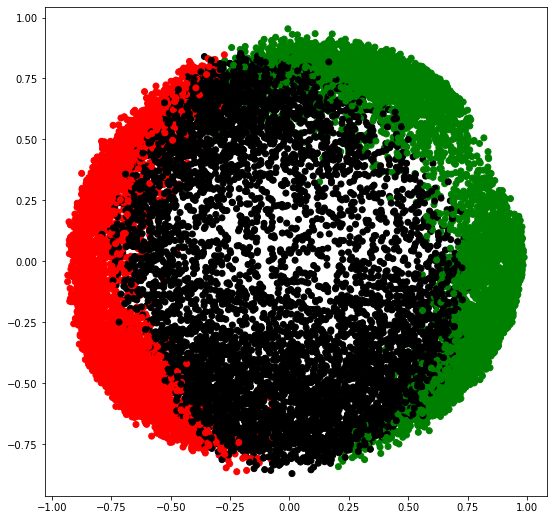

In [16]:
cvec = [colours1[label] for label in labels]
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=cvec)
plt.show()



In [28]:
from sklearn.metrics.pairwise import euclidean_distances

class Similarity:
  def __init__(self,labels,data,cluster_number):
    self.data=data
    self.label=labels
    self.clusters=cluster_number
    self.metric={}
    # cluster=[]
    # for i in range(self.clusters):
    #   cluster.append([])

    # for i in range(len(self.data)):
    #   cluster[int(self.label[i])].append(data[i])
    
   

  def IntializeMatrix(Self,n,m):
    return np.zeros((n,m),dtype = float)

  def Distances(self):
    cluster=[]
    n=self.clusters
    for i in range(self.clusters):
      cluster.append([])

    for i in range(len(self.data)):
      cluster[int(self.label[i])].append(self.data[i])
    
    for i  in range(self.clusters):
      cluster[i]=np.array(cluster[i])
      print(len(cluster[i]))
    
    Single_Link_Matrix=self.IntializeMatrix(n,n)
    Complete_Link_Matrix=self.IntializeMatrix(n,n)
    Average_Link_Matrix=self.IntializeMatrix(n,n)
    Mean_Link_Matrix=self.IntializeMatrix(n,n)

    for i in range(self.clusters):
      for j in range(i,self.clusters):
        dist=euclidean_distances(cluster[i],cluster[j])
        # print(dist)
        # break
        min=np.amin(dist)
        max=np.amax(dist)
        average=np.mean(dist)
        # print(i,j)
        # print(min,max,average)
        # print(np.mean(cluster[i],axis=0))


        mean=np.linalg.norm(np.mean(cluster[i],axis=0)-np.mean(cluster[j],axis=0))
        Single_Link_Matrix[i][j] = Single_Link_Matrix[j][i] = min
        Complete_Link_Matrix[i][j]= Complete_Link_Matrix[j][i] = max
        Average_Link_Matrix[i][j] = Average_Link_Matrix[j][i] = average
        Mean_Link_Matrix[i][j] = Mean_Link_Matrix[j][i] = mean
      # break
        # print(Single_Link_Matrix)

    self.metric['single link']=Single_Link_Matrix
    self.metric['complete link']=Complete_Link_Matrix
    self.metric['average link']=Average_Link_Matrix
    self.metric['mean link']=Mean_Link_Matrix

    return self.metric


In [29]:
similarity=Similarity(labels,normalize_data.to_numpy().tolist(),3)
ans=similarity.Distances()
print(ans)

1043
210
14869
{'single link': array([[0.        , 0.53643984, 0.24479287],
       [0.53643984, 0.        , 0.24920522],
       [0.24479287, 0.24920522, 0.        ]]), 'complete link': array([[1.0952359 , 1.5392969 , 1.9748635 ],
       [1.5392969 , 0.77590356, 1.97561555],
       [1.9748635 , 1.97561555, 1.97193189]]), 'average link': array([[0.54406358, 1.04298007, 1.42310079],
       [1.04298007, 0.47445689, 1.40775967],
       [1.42310079, 1.40775967, 1.37425542]]), 'mean link': array([[0.        , 0.91664027, 1.00805224],
       [0.91664027, 0.        , 1.00496957],
       [1.00805224, 1.00496957, 0.        ]])}


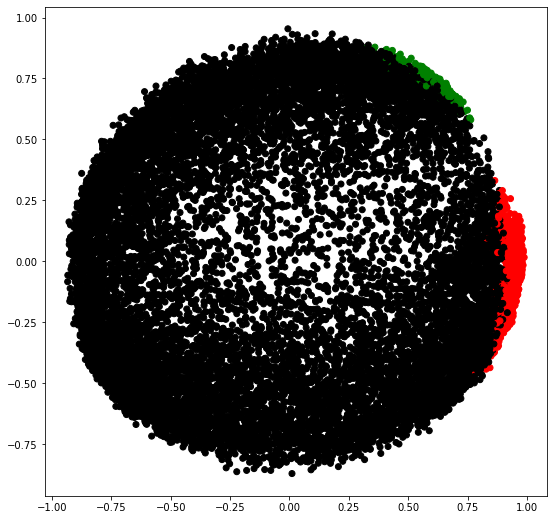

In [27]:
db=DBSCAN(eps=0.4,min_samples=100).fit(normalize_data)
labels=db.labels_
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
cvec = [colours1[label] for label in labels]
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=cvec)
plt.show()


In [26]:
(Counter(labels).values())

dict_values([1919, 10934, 3269])